In [1]:
#Import the libraries to analyze the data

import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data using pandas

df = pd.read_csv('train.csv')
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

# # Working with the missing values

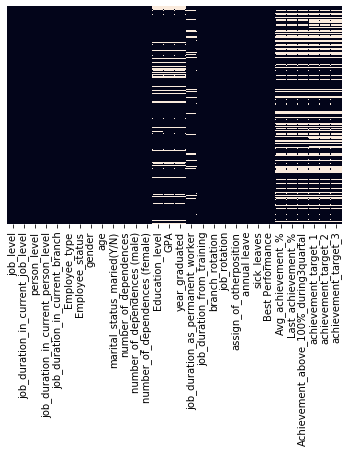

In [4]:
#Visualize the missing values using heatmap

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rocket')

In [5]:
df['Employee_type'].isnull().value_counts()

False    21993
True        12
Name: Employee_type, dtype: int64

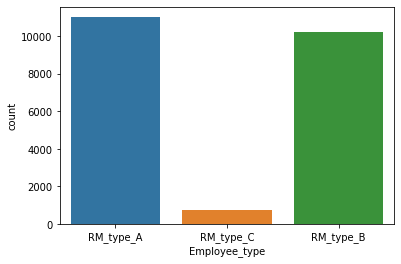

In [6]:
sns.countplot(df['Employee_type'])

In [7]:
#Use the most common type to fill the missing values
#Here's RM_type_A and RM_type_B

df['Employee_type'] = df['Employee_type'].fillna(value='RM_type_A', limit=6)

In [8]:
df['Employee_type'].isnull().value_counts()

False    21999
True         6
Name: Employee_type, dtype: int64

In [9]:
df['Employee_type'] = df['Employee_type'].fillna(value='RM_type_B')
df['Employee_type'].isnull().value_counts()

False    22005
Name: Employee_type, dtype: int64

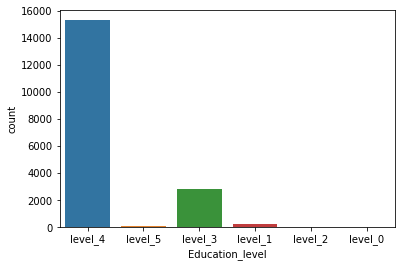

In [10]:
sns.countplot(df['Education_level'])

In [11]:
#As before, take the most common level
#Here's level_4

df['Education_level'] = df['Education_level'].fillna(value='level_4')
df['Education_level'].isnull().value_counts()

False    22005
Name: Education_level, dtype: int64

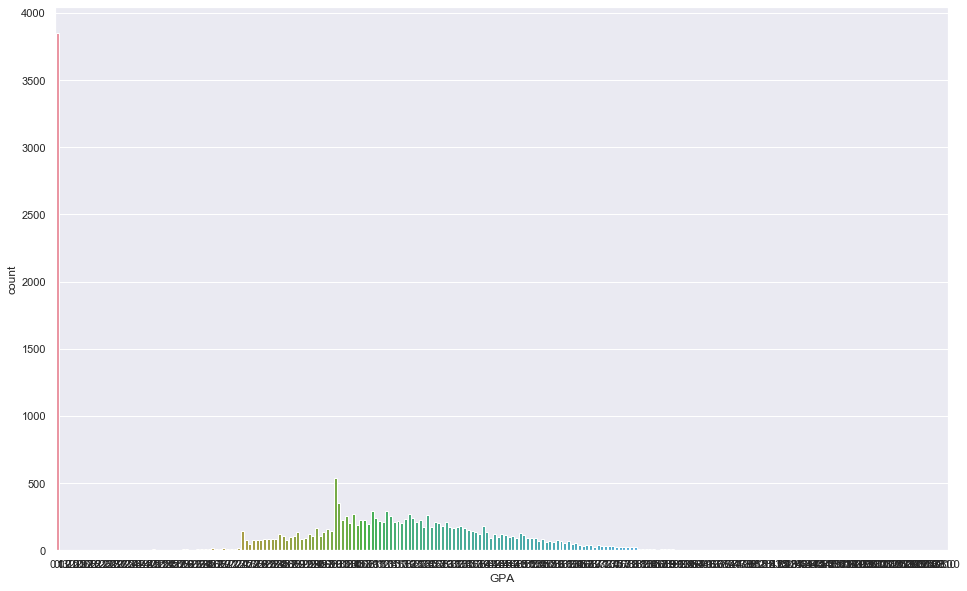

In [12]:
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(df['GPA'])

In [13]:
#Take the mean of the datas to fill the missing value
val = df['GPA'].mean()
df['GPA'] = df['GPA'].fillna(value=val)

In [14]:
df['GPA'].isnull().value_counts()

False    22005
Name: GPA, dtype: int64

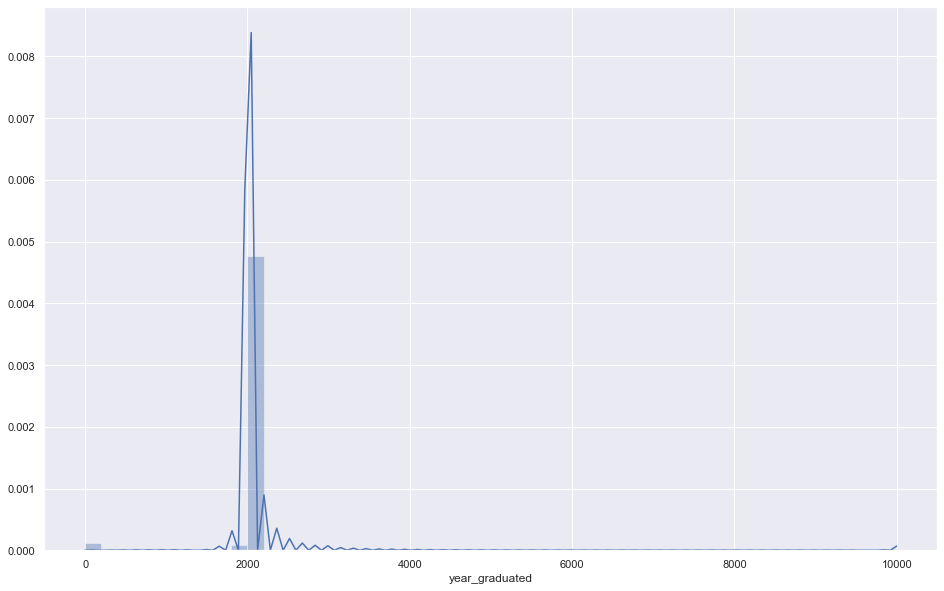

In [15]:
#We must first convert the values in year_graduated column from object type to float type

df['year_graduated'] = pd.to_numeric(df['year_graduated'],errors='coerce')
sns.distplot(df['year_graduated'])

In [16]:
#As seen from the graph above, we just take the modulus

df['year_graduated'] = df['year_graduated'].fillna(value=2000)
df['year_graduated'].isnull().value_counts()

False    22005
Name: year_graduated, dtype: int64

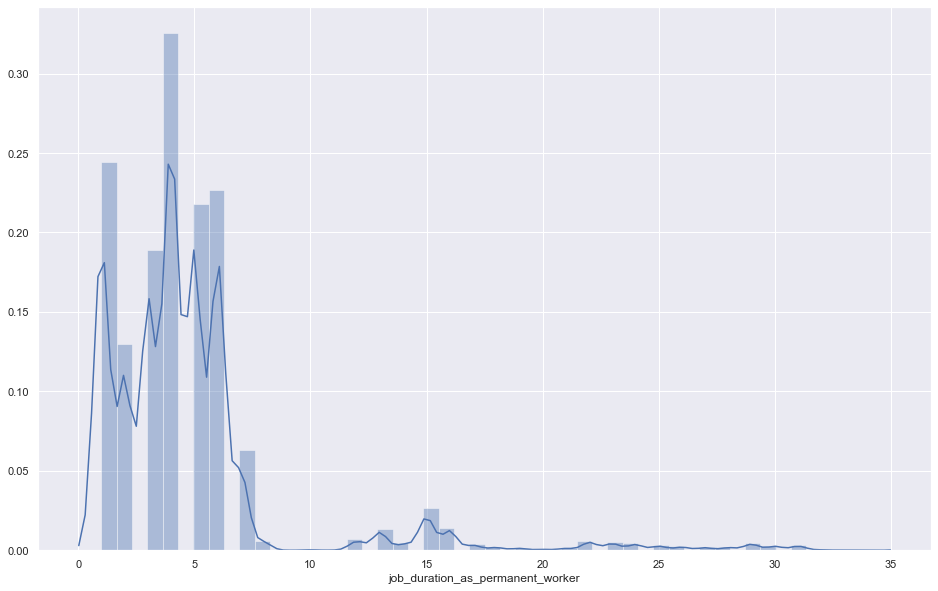

In [17]:
sns.distplot(df['job_duration_as_permanent_worker'])

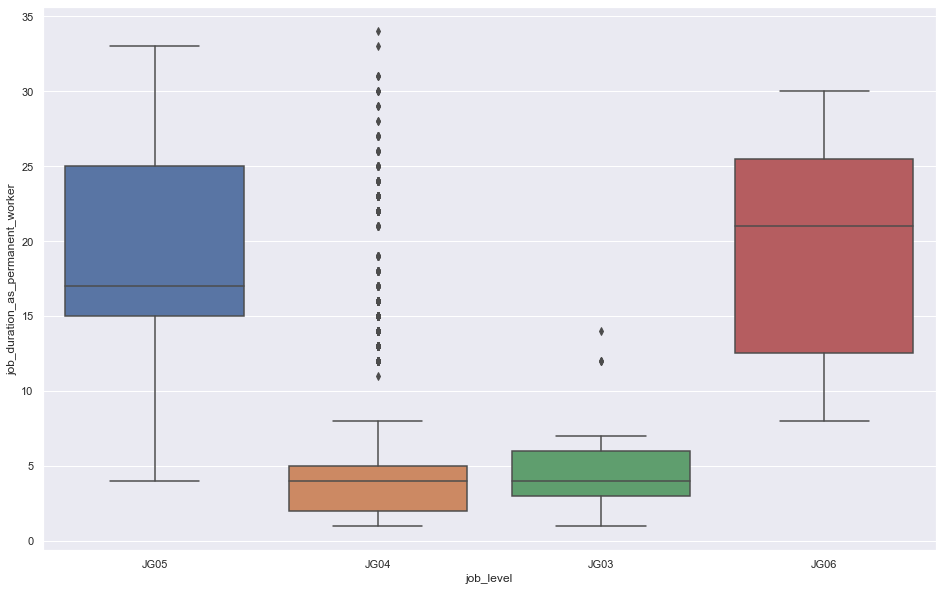

In [18]:
sns.boxplot(x=df['job_level'], y=df['job_duration_as_permanent_worker'], data=df)

In [19]:
#Create the function to handle the missing values
#Using the relation from the graph above

def job_dur(x):
    job = x[0]
    job_lev = x[1]
    if pd.isnull(job):
        if job_lev == 'JG05':
            return 17.0
        elif job_lev == 'JG04':
            return 4.5
        elif job_lev == 'JG03':
            return 4.5
        else:
            return 22.0
    else:
        return job

df['job_duration_as_permanent_worker'] = df[['job_duration_as_permanent_worker', 'job_level']].apply(job_dur, axis=1)
df['job_duration_as_permanent_worker'].isnull().value_counts()

False    22005
Name: job_duration_as_permanent_worker, dtype: int64

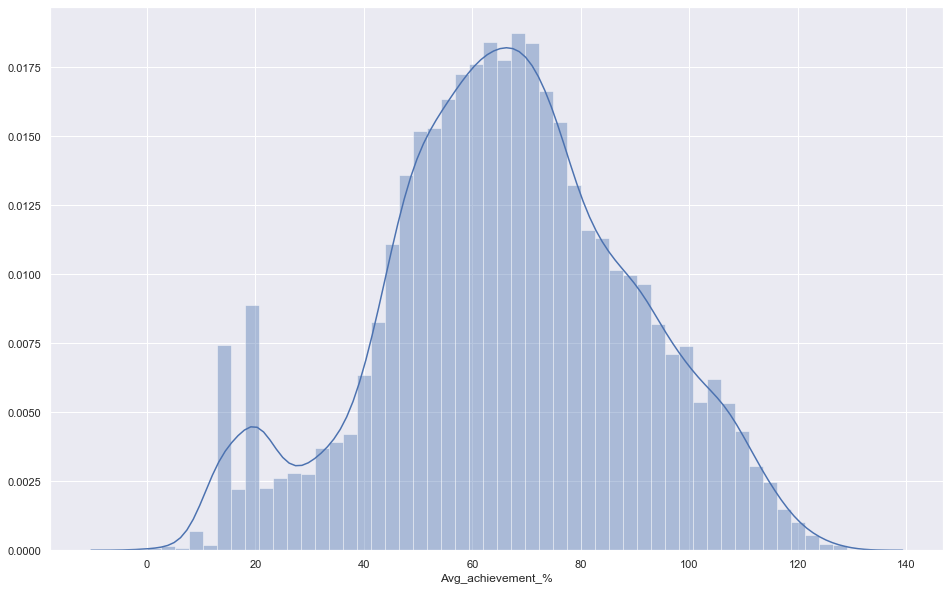

In [20]:
sns.distplot(df['Avg_achievement_%'])

In [21]:
#Just take the mean of the column

val = df['Avg_achievement_%'].mean()
df['Avg_achievement_%'] = df['Avg_achievement_%'].fillna(value=val)
df['Avg_achievement_%'].isnull().value_counts()

False    22005
Name: Avg_achievement_%, dtype: int64

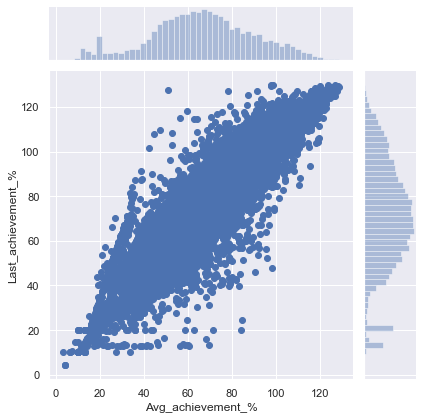

In [22]:
sns.jointplot(x=df['Avg_achievement_%'], y=df['Last_achievement_%'])

In [23]:
#As the linearity of the data, we can fill with the same values as Avg_achievement_% column
#Create the function

def last(x):
    last = x[0]
    avg = x[1]
    if pd.isnull(last):
        return avg
    else:
        return last

df['Last_achievement_%'] = df[['Last_achievement_%', 'Avg_achievement_%']].apply(last, axis=1)
df['Last_achievement_%'].isnull().value_counts()

False    22005
Name: Last_achievement_%, dtype: int64

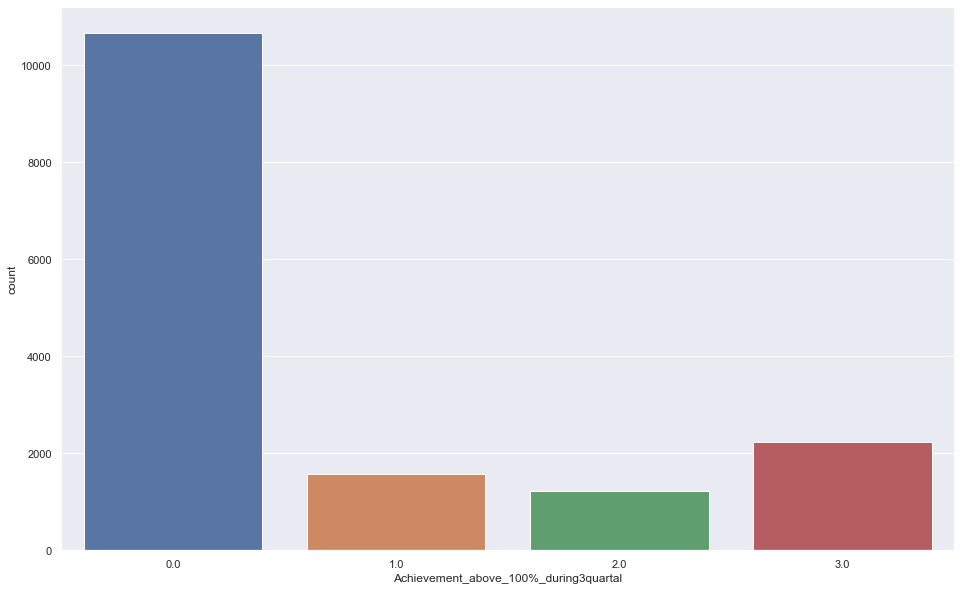

In [24]:
sns.countplot(df['Achievement_above_100%_during3quartal'])

In [25]:
#Just take the modulus of the column

df['Achievement_above_100%_during3quartal'] = df['Achievement_above_100%_during3quartal'].fillna(value=0.0)
df['Achievement_above_100%_during3quartal'].isnull().value_counts()

False    22005
Name: Achievement_above_100%_during3quartal, dtype: int64

In [26]:
df['achievement_target_1'].value_counts()

achiev_50%-100%           7679
achiev_100%-150%          2519
achiev_< 50%              2065
Pencapaian 50%-100%       1531
achiev_> 1.5               597
Pencapaian 100%-150%       485
Tidak diberikan target     178
Pencapaian < 50%           175
Pencapaian > 1.5            49
Name: achievement_target_1, dtype: int64

In [27]:
#Cause Pencapaian and achiev has the same meaning, so we must convert one of it
#Use Regex (Regular Expression) to find and change it

import re
df = df.replace(to_replace = '^Pencapaian ', value='achiev_', regex=True)
df['achievement_target_1'].value_counts()

achiev_50%-100%           9210
achiev_100%-150%          3004
achiev_< 50%              2240
achiev_> 1.5               646
Tidak diberikan target     178
Name: achievement_target_1, dtype: int64

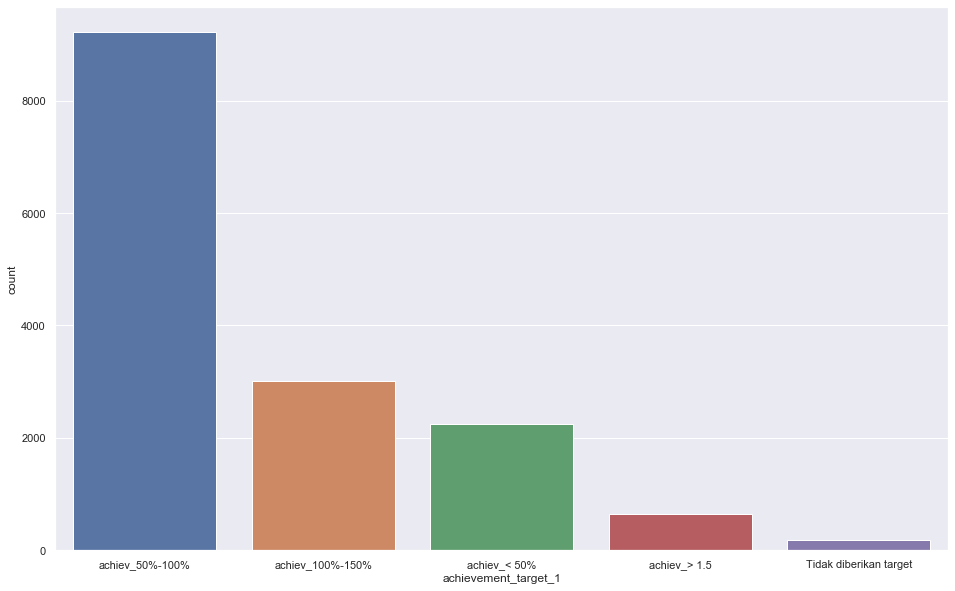

In [28]:
sns.countplot(df['achievement_target_1'])

In [29]:
#Fill with the most common, achiev_50%-100% and achiev_100%-150%

df['achievement_target_1'] = df['achievement_target_1'].fillna(value='achiev_50%-100%', limit=5000)
df['achievement_target_1'].isnull().value_counts()

False    20278
True      1727
Name: achievement_target_1, dtype: int64

In [30]:
df['achievement_target_1'] = df['achievement_target_1'].fillna(value='achiev_100%-150%')
df['achievement_target_1'].isnull().value_counts()

False    22005
Name: achievement_target_1, dtype: int64

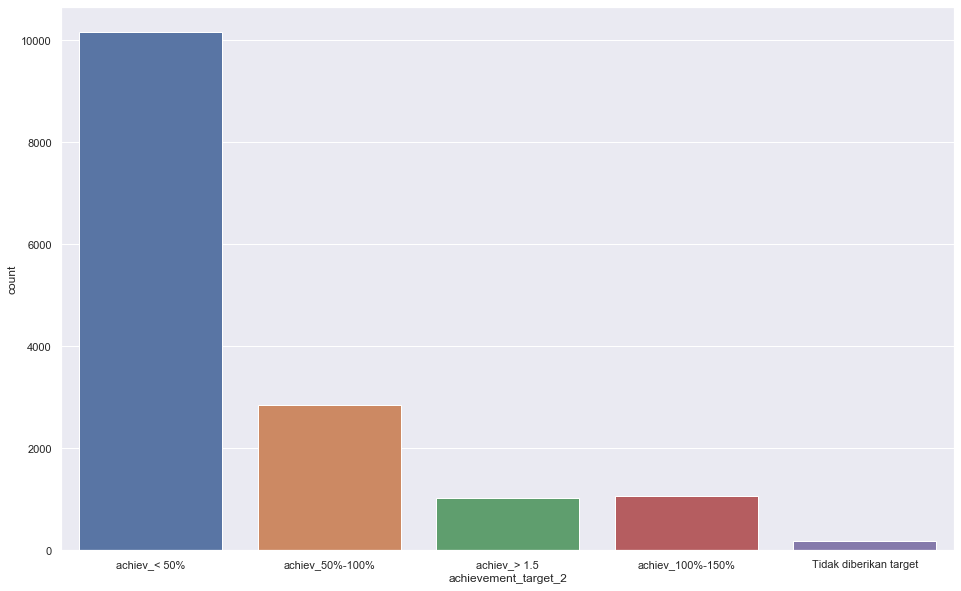

In [31]:
sns.countplot(df['achievement_target_2'])

In [32]:
#As before, we just take the modulus

df['achievement_target_2'] = df['achievement_target_2'].fillna(value='achiev_< 50%', limit=5000)
df['achievement_target_2'].isnull().value_counts()

False    20278
True      1727
Name: achievement_target_2, dtype: int64

In [33]:
df['achievement_target_2'] = df['achievement_target_2'].fillna(value='achiev_50%-100%')
df['achievement_target_2'].isnull().value_counts()

False    22005
Name: achievement_target_2, dtype: int64

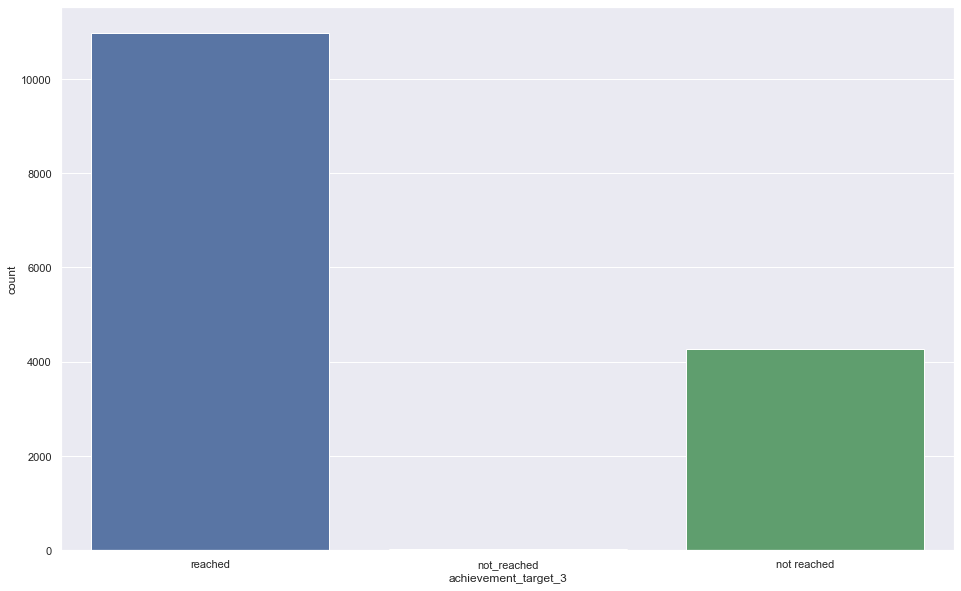

In [34]:
sns.countplot(df['achievement_target_3'])

In [35]:
#As before, not_reached and not reached column has the same value
#So just converge it using regex

df = df.replace(to_replace = '^not_', value='not ', regex=True)
df['achievement_target_3'].value_counts()

reached        10985
not reached     4293
Name: achievement_target_3, dtype: int64

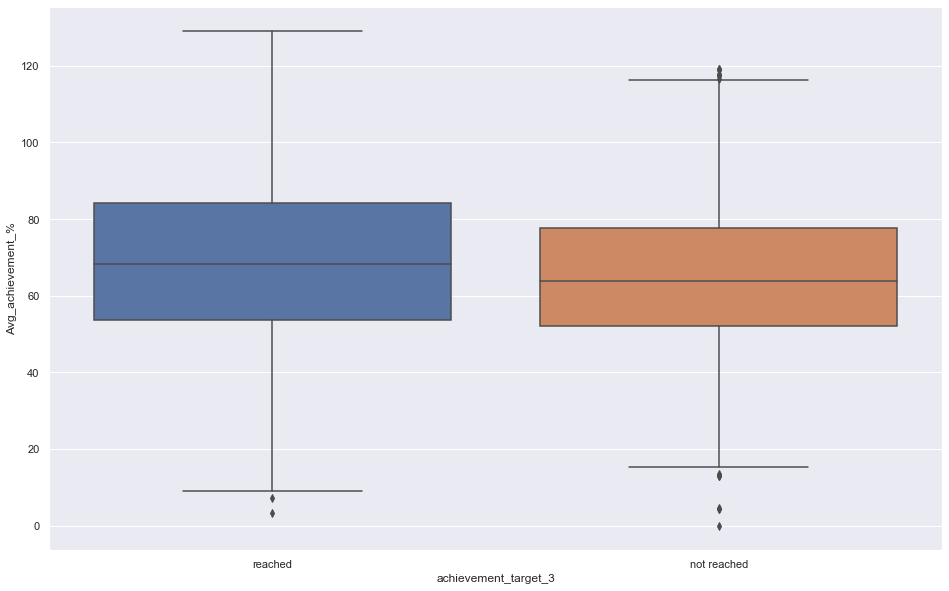

In [36]:
sns.boxplot(x=df['achievement_target_3'], y=df['Avg_achievement_%'], data=df)

In [37]:
#Fill it just as before

df['achievement_target_3'] = df['achievement_target_3'].fillna(value='reached', limit=5000)
df['achievement_target_3'].value_counts()

reached        15985
not reached     4293
Name: achievement_target_3, dtype: int64

In [38]:
df['achievement_target_3'] = df['achievement_target_3'].fillna(value='not reached')
df['achievement_target_3'].isnull().value_counts()

False    22005
Name: achievement_target_3, dtype: int64

In [39]:
#Check again if there's a missing value left

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          22005 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

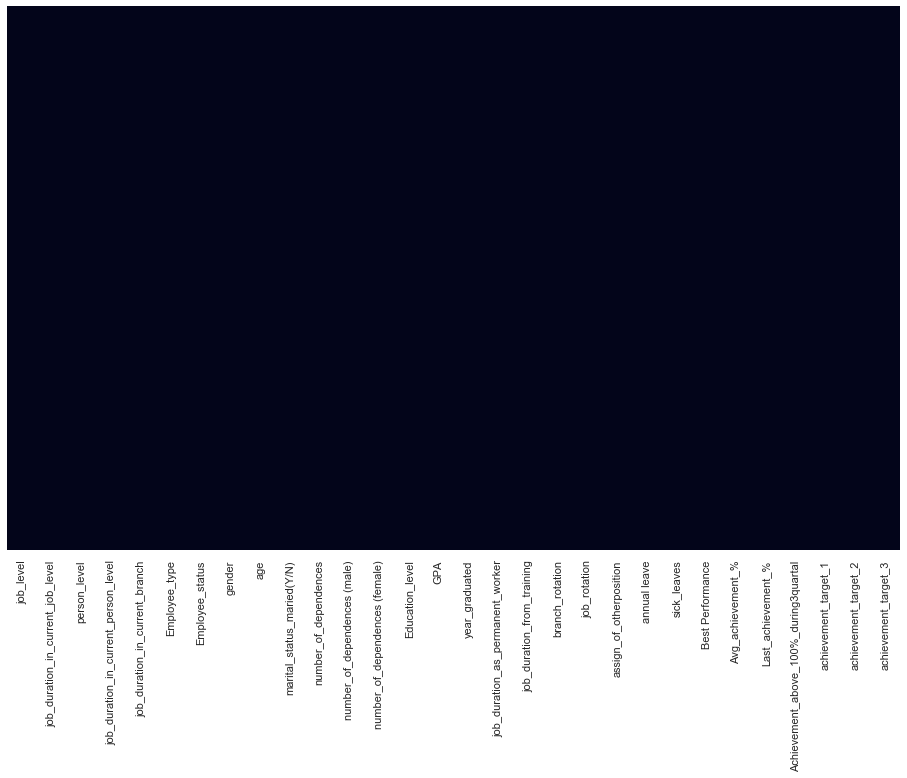

In [40]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rocket')

# #Start modeling the data

In [79]:
#First we must convert string data to number using dummies

df_new = pd.get_dummies(data=df.drop('Best Performance', axis=1), 
                        columns=['job_level', 'person_level', 'Employee_type', 'Employee_status', 'gender',
                                          'marital_status_maried(Y/N)', 'Education_level', 'achievement_target_1',
                                          'achievement_target_2', 'achievement_target_3'])
df_new.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,year_graduated,job_duration_as_permanent_worker,...,achievement_target_1_achiev_50%-100%,achievement_target_1_achiev_< 50%,achievement_target_1_achiev_> 1.5,achievement_target_2_Tidak diberikan target,achievement_target_2_achiev_100%-150%,achievement_target_2_achiev_50%-100%,achievement_target_2_achiev_< 50%,achievement_target_2_achiev_> 1.5,achievement_target_3_not reached,achievement_target_3_reached
0,8.00,8.00,0.50,1964,3,1,2,2.320000,1987.0,30.0,...,1,0,0,0,0,0,1,0,0,1
1,5.17,2.00,1.25,1979,3,2,1,3.250000,2001.0,15.0,...,1,0,0,0,0,1,0,0,0,1
2,1.83,1.83,1.50,1980,1,0,1,3.230000,2007.0,15.0,...,0,0,0,0,0,0,1,0,1,0
3,7.92,4.00,0.17,1984,0,0,0,0.000000,2006.0,8.0,...,1,0,0,0,0,1,0,0,1,0
4,1.83,1.83,2.08,1984,1,0,1,2.994603,2000.0,7.0,...,0,1,0,0,0,0,0,1,1,0


In [87]:
train_data = df_new.drop(['job_level_JG06', 'person_level_PG08', 'Employee_status_Contract'], axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   job_duration_in_current_job_level            22005 non-null  float64
 1   job_duration_in_current_person_level         22005 non-null  float64
 2   job_duration_in_current_branch               22005 non-null  float64
 3   age                                          22005 non-null  int64  
 4   number_of_dependences                        22005 non-null  int64  
 5   number_of_dependences (male)                 22005 non-null  int64  
 6   number_of_dependences (female)               22005 non-null  int64  
 7   GPA                                          22005 non-null  float64
 8   year_graduated                               22005 non-null  float64
 9   job_duration_as_permanent_worker             22005 non-null  float64
 10

In [42]:
#Train the data using decision tree classifier
#import the library

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [88]:
X_train = train_data
y_train = df['Best Performance']

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
#Predict the test data
#First we need to clean the data

test_data = pd.read_csv('test.csv')
test_data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   Employee_status                        6000 non-null   object 
 7   gender                                 6000 non-null   object 
 8   age                                    6000 non-null   int64  
 9   marital_status_maried(Y/N)             6000 non-null   object 
 10  number_of_dependences                  6000 non-null   int64  
 11  numb

In [91]:
test_data['year_graduated'] = pd.to_numeric(test_data['year_graduated'],errors='coerce')

In [92]:
test_data = test_data.replace(to_replace = '^Pencapaian ', value='achiev_', regex=True)

In [93]:
test_data = test_data.replace(to_replace = '^not_', value='not ', regex=True)

In [94]:
X_test = pd.get_dummies(data=test_data, columns=['job_level', 'person_level', 'Employee_type', 'Employee_status', 'gender',
                                          'marital_status_maried(Y/N)', 'Education_level', 'achievement_target_1',
                                          'achievement_target_2', 'achievement_target_3'])

In [95]:
X_test['year_graduated'] = X_test['year_graduated'].fillna(value=2011.0)

In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   job_duration_in_current_job_level            6000 non-null   float64
 1   job_duration_in_current_person_level         6000 non-null   float64
 2   job_duration_in_current_branch               6000 non-null   float64
 3   age                                          6000 non-null   int64  
 4   number_of_dependences                        6000 non-null   int64  
 5   number_of_dependences (male)                 6000 non-null   int64  
 6   number_of_dependences (female)               6000 non-null   int64  
 7   GPA                                          6000 non-null   float64
 8   year_graduated                               6000 non-null   float64
 9   job_duration_as_permanent_worker             6000 non-null   float64
 10  

In [97]:
pred = dtree.predict(X_test)

In [105]:
#See the metrics

from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(df['Best Performance'][:6000],pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5207
           1       0.15      0.19      0.17       793

    accuracy                           0.75      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.78      0.75      0.76      6000



In [107]:
print(confusion_matrix(df['Best Performance'][:6000],pred))

[[4321  886]
 [ 641  152]]


## Done!